In [1]:
import os
import time
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from model_settings import ms
from feature_collector import preprocess_data
from df_collector import df_collector
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.5f}'.format
root = Path().resolve().parent.parent
df_collector.root = root
models_dir = os.path.join(root,ms.trained_models)
train_start = time.time()
train_start_datetime = datetime.fromtimestamp(train_start)
train_start_tag = train_start_datetime.strftime('%c')
print("\n"+"#"*18+"\n# training start #\n"+
      "#"*18+"\n"+f"\n{train_start_tag}")


##################
# training start #
##################

Wed Nov  6 13:42:16 2024


# initializing

In [2]:
from convsklearn import convsklearn,barrier_features
trainer = convsklearn(**barrier_features)

In [3]:
dataset = df_collector.cboe_spx_barriers().iloc[:,1:]
dataset = dataset[dataset['barrier_price']<dataset['spot_price']]
dataset

,spot_price,strike_price,barrier,days_to_maturity,updown,outin,w,barrier_type_name,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,date,barrier_price
0,4424.00000,3981.60000,2212.00000,60,Down,Out,call,DownOut,0.00000,0.00000,0.04000,0.04949,26.62607,-0.61054,6.49034,0.15574,2022-01-26 14:39:54.042,2022-01-26,519.00142
1,4424.00000,3981.60000,2212.00000,60,Down,Out,put,DownOut,0.00000,0.00000,0.04000,0.04949,26.62607,-0.61054,6.49034,0.15574,2022-01-26 14:39:54.042,2022-01-26,36.84016
2,4424.00000,3981.60000,2212.00000,60,Down,In,call,DownIn,0.00000,0.00000,0.04000,0.04949,26.62607,-0.61054,6.49034,0.15574,2022-01-26 14:39:54.042,2022-01-26,0.00000
3,4424.00000,3981.60000,2212.00000,60,Down,In,put,DownIn,0.00000,0.00000,0.04000,0.04949,26.62607,-0.61054,6.49034,0.15574,2022-01-26 14:39:54.042,2022-01-26,9.99191
4,4424.00000,3981.60000,2212.00000,90,Down,Out,call,DownOut,0.00000,0.00000,0.04000,0.04949,26.62607,-0.61054,6.49034,0.15574,2022-01-26 14:39:54.042,2022-01-26,546.03043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27725755,5813.50000,6394.85000,8720.25000,540,Up,In,put,UpIn,0.00000,0.00000,0.04000,0.08750,1.98223,-0.65710,1.70557,0.01895,2024-10-15 16:50:04.131,2024-10-15,6.57734
27725756,5813.50000,6394.85000,8720.25000,720,Up,Out,call,UpOut,0.00000,0.00000,0.04000,0.08750,1.98223,-0.65710,1.70557,0.01895,2024-10-15 16:50:04.131,2024-10-15,377.39147
27725757,5813.50000,6394.85000,8720.25000,720,Up,Out,put,UpOut,0.00000,0.00000,0.04000,0.08750,1.98223,-0.65710,1.70557,0.01895,2024-10-15 16:50:04.131,2024-10-15,650.45980
27725758,5813.50000,6394.85000,8720.25000,720,Up,In,call,UpIn,0.00000,0.00000,0.04000,0.08750,1.98223,-0.65710,1.70557,0.01895,2024-10-15 16:50:04.131,2024-10-15,189.45925


In [4]:
filetag = 'cboe barriers'
price_name = 'barrier_price'
dataset = dataset[dataset[price_name]<dataset['spot_price']].dropna().reset_index(drop=True)
dataset['observed_price'] = np.maximum(dataset[price_name] + np.random.normal(scale=(0.15)**2,size=dataset.shape[0]),0)
dates = pd.Series(np.sort(dataset['date'].unique()))
dates

0      2022-01-26
1      2022-01-27
2      2022-01-28
3      2022-01-31
4      2022-02-01
          ...    
679    2024-10-09
680    2024-10-10
681    2024-10-11
682    2024-10-14
683    2024-10-15
Length: 684, dtype: object

In [5]:
development_dates = dates[:len(dates)//4]
test_dates = dates[~dates.isin(development_dates)]

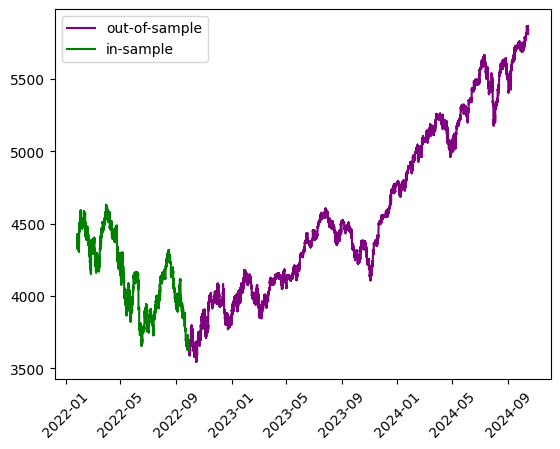

In [6]:
preprocessed = trainer.preprocess_data(dataset,development_dates,test_dates)

In [ ]:
model_fit = trainer.run_dnn()
trainer.model_fit


training...

alpha: 0.01
hidden_layer_sizes: (14, 14)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001


In [ ]:
trainer.train_X

In [ ]:
trainer.__dict__

In [ ]:
train_test = trainer.test_prediction_accuracy()

# saving

In [ ]:
train_end = time.time()
train_end_tag = str(datetime.fromtimestamp(
    train_end).strftime("%Y_%m_%d %H%M%S%f"))
file_tag = str(train_end_tag + " " + filetag)
files_dir = os.path.join(models_dir,file_tag)

def save_model():
    if Path(files_dir).exists():
        pass
    else:
        os.mkdir(files_dir)
    file_dir = os.path.join(files_dir,file_tag)
    joblib.dump(trainer.__dict__,str(f"{file_dir}.pkl"))
    pd.set_option("display.max_columns",None)
    print(f"model saved to {file_dir}")

print(f"execute the command 'save_model()' to save the following model: {file_tag}")
train_runtime = train_end-train_start
print(f"\ncpu: {train_runtime}")